<a href="https://colab.research.google.com/github/chatterjeerajdeep/machine-learning-projects/blob/main/EDA_for_insurance_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import the libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Read the input file and get basic information about the data

In [ ]:
data = pd.read_csv("/content/insurance.csv")
# source: https://www.kaggle.com/mirichoi0218/insurance?select=insurance.csv

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
print("There are {0} rows and {1} column in the data:: ".format(data.shape[0], data.shape[1]))
print("Missing Values:: {}\n".format(data.isnull().sum().values.sum()))
print(data.isnull().sum())
print("Count of unique values in each column:: \n")
print(data.nunique())

There are 1338 rows and 7 column in the data:: 
Missing Values:: 0

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Count of unique values in each column:: 

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



Observations:


*   There are no missing values
*   age, bmi, children and charges are quantitative variables which are continuous except children which is discrete. smoker, sex and region are categorical variables.


*   The average bmi of people who have claimed insurance is 30, which is much above normal
*   The average age of people who have claimed insurance is 39. 


*   Every person who have claimed insurance have 1 children on average
*   The average insurance charge claimed is around 13,300



*   The mean and median values for age, bmi and children are almost the same, meaning that their distributions are fairly symmetrical.
*   The median value for charges is much less than the mean value. There is a positive skew in the charges.






Queries

*   Why is the average age of people who have claimed insurance on the lower side? Which sex has the highest frequency of claims around this age? What can be the possible reason?




### Univariate Analysis

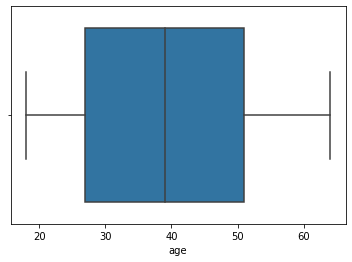

In [ ]:
# observing the variation in "age"
sns.boxplot(x = data["age"], orient = "h")

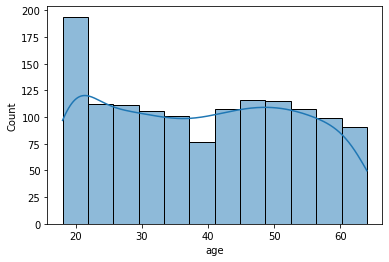

In [ ]:
sns.histplot(data['age'], kde=True)

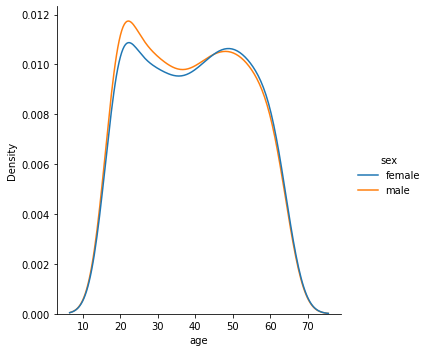

In [ ]:
sns.displot(data, x = "age", hue="sex", kind="kde")

Observations:


*   As found before, average age is around 40
*   Modal age is around 18-22
*   There are more number of mail beneficiaries around the modal age than female

Information: I found that in US, teenage drivers have the highest records of causing accidents. So maybe an additional field like whether the person drives or not could be useful to explain this.



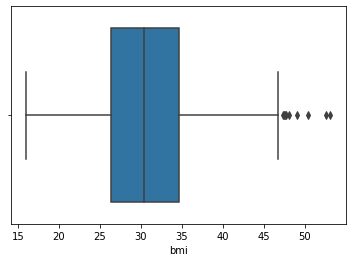

In [ ]:
# observing the variation in "bmi"
sns.boxplot(x = data["bmi"], orient = "h")

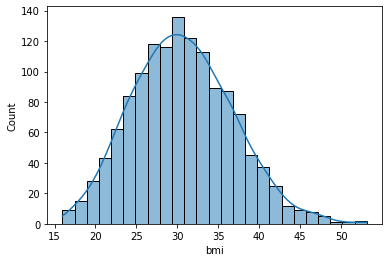

In [ ]:
sns.histplot(data['bmi'], kde=True)

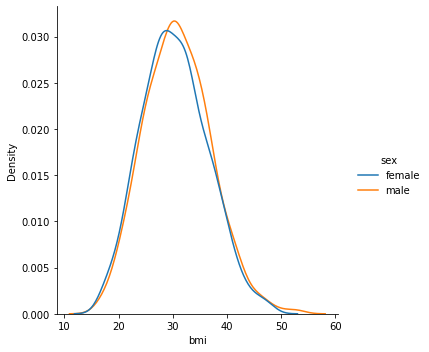

In [ ]:
sns.displot(data, x = "bmi", hue="sex", kind="kde")


*   There are some outliers in the bmi data
*   Male beneficiaries have slightly higher bmi on an average than female



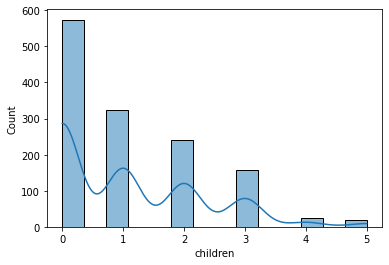

In [ ]:
sns.histplot(data['children'], kde=True)



*   Most people who have billed insurance charges, have no children. Does it have something to do with the fact that most people who have claimed, are in the age of 18-22?



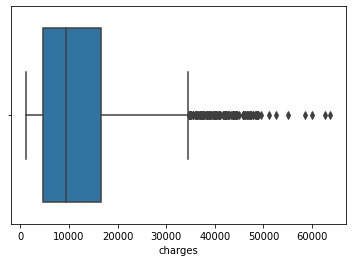

In [ ]:
# observing the variation in "charges"
sns.boxplot(x = data["charges"], orient = "h")

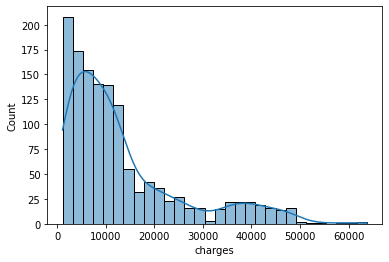

In [ ]:
sns.histplot(data['charges'], kde=True)



*   There are quite a lot of outlier points for charges, we can try transforming the data before applying regression models on it
*   As observed before, the data is positively skewed



### Multi-variate Analysis



*   Let's start with identifying which features affect the charges the most



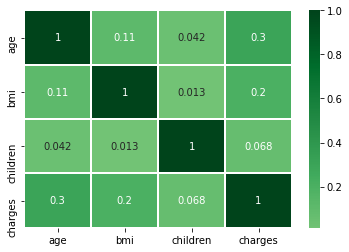

In [ ]:
sns.heatmap(data.corr(), annot=True, linewidth=1, cmap="Greens", center = 0)

As observed from the correlation heatmap - age and bmi affect the charges. We have not transformed sex, region and smoker yet, so their effects are not captured in this heatmap

#### Effect of age, smoker

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


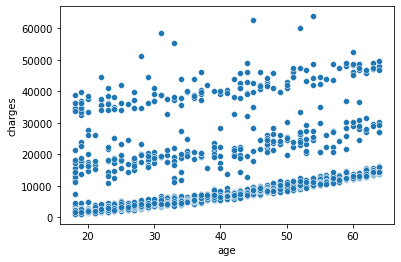

In [ ]:
sns.scatterplot(data['age'],data['charges'])

##### Observations

Observations 

*   For same age groups, the charges are different and arranged in 3 distinct stacks
*   In all the 3 stacks, the charges increase linearly with age

Inference


*   There are some other factors which are very crucial in determining the charges and those factors vary among all age groups


What can be those features?





##### Variation of charges with age, smoker wise

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


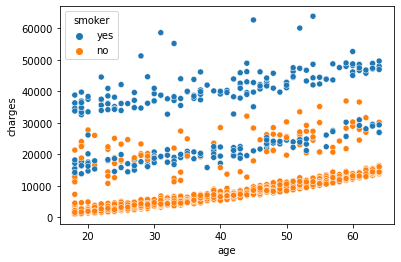

In [ ]:
sns.scatterplot(data['age'],data['charges'], hue=data['smoker'])

##### Effect of smoker - Do smokers claim more charge than non-smokers?

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


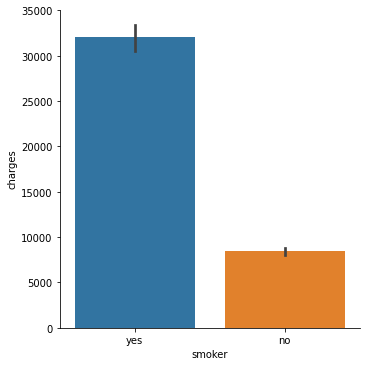

In [ ]:
# check the effect of smoker status on charges
sns.factorplot(x = "smoker", y = "charges", data = data, kind = "bar")

##### observations

Observations

*   non-smokers claim much lesser charges than the smokers
*   smokers and non-smokers are present across all age groups

*   The lower most stack of charges are all non-smokers and the top most stack are all smokers but the middle stack has a mix of smokers and non-smokers


Queries

*   How are smokers and non-smokers distributed across different age groups?

*   How are smokers and non-smokers distributed across different regions?

*   Is there a difference in the frequency of smokers and non-smokers between male and female?


*   How can the middle stack of charges be explained? Are there any other factors affecting the price along with smoker?







##### Do all age groups have same distribution of smoker?

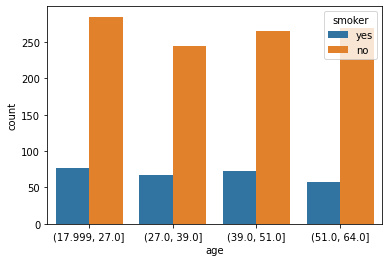

In [ ]:
sns.countplot(x=pd.qcut(data["age"], q=4), hue='smoker', data=data)

##### Do all regions have same distribution of smokers?

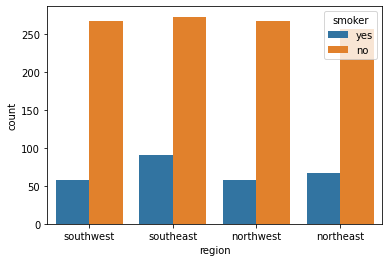

In [ ]:
sns.countplot(x="region", hue='smoker', data=data)

##### Variation of charges with age, region wise

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


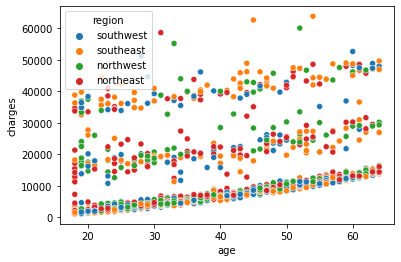

In [ ]:
sns.scatterplot(data['age'],data['charges'], hue=data['region'])

##### Which sex has more smokers?



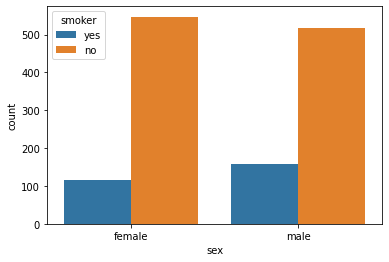

In [ ]:
sns.countplot(x="sex", hue='smoker', data=data)

##### Variation of charges with age, sex wise

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


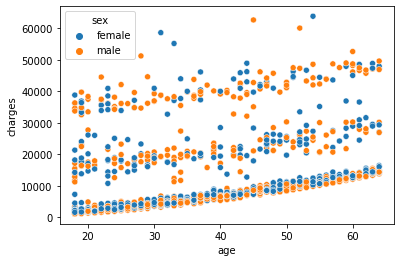

In [ ]:
sns.scatterplot(data['age'],data['charges'], hue=data['sex'])

##### Observations

Inferences:


*   The distribution of smokers and non-smokers across different age groups are almost same


*   Southeast region has the max number of smokers among all regions. 


*   There are more male smokers than female smokers

Queries



*   If Southeast region has the max number of smokers, do they claim the highest charges?
*   If there are more male smokers than female, do male claim higher charges?





##### Which sex claims more charge?




/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


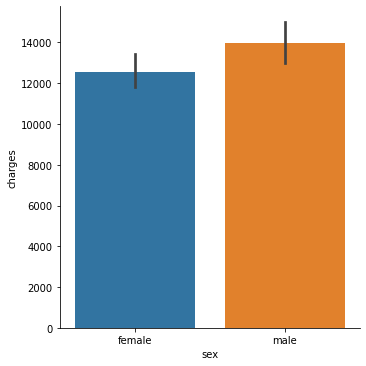

In [ ]:
# check the effect of sex on charges
sns.factorplot(x = "sex", y = "charges", data = data, kind = "bar")

##### Is the trend same across all age groups?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


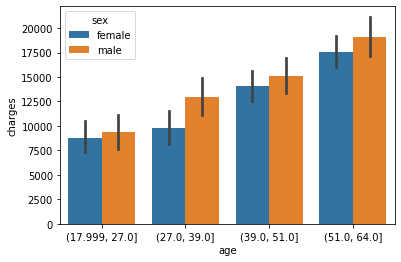

In [ ]:
sns.barplot(pd.qcut(data["age"], q=4), data["charges"], hue=data["sex"])

##### Which region claims more charge?

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


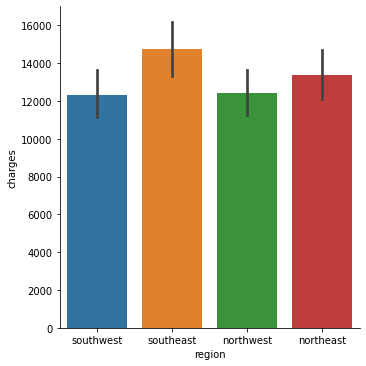

In [ ]:
# check the effect of region on charges
sns.factorplot(x = "region", y = "charges", data = data, kind = "bar")

##### Observations

Observation



*   Yes, male claim more charges than female
*   Yes, southeast region claims more charges than any other region


*   Male always pay more charges than female across all age groups


Inference






*   It is the smoker which majorly determines the charges
*   There are more male smokers than female smokers which majorly explain why male always claim more charges than female across all age groups


*   There are more smokers in the southeast region which majorly explains why people from southeast region claim more charges








#### Effect of number of children - is the number of children distributed uniformly across all age groups?



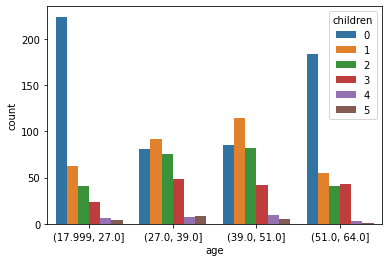

In [ ]:
sns.countplot(x = pd.qcut(data["age"], q = 4), hue="children", data=data)

##### Is the number of children distributedly unformly across sex

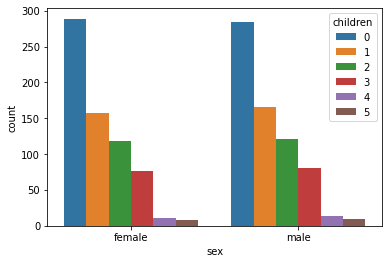

In [ ]:
sns.countplot(x="sex", hue="children", data=data)

##### Observations

Observation


*   male and female show very similar trend in the number of children
*   People mostly have 0 children in the first age quartile. In the next two age brackets, people have 1 children on average. In the fourth age bracket however, people who claimed charges mostly have no children.

There can be a number of factors that could lead to this trend, but there isn't the supporting evidence to substantiate much

Queries


*   Does number of children affect charges differently for smokers and non-smokers?





##### What is the effect of number of children on charges claimed?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


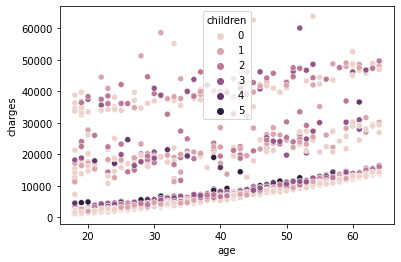

In [ ]:
sns.scatterplot(data['age'],data['charges'], hue=data['children'])

##### For smokers

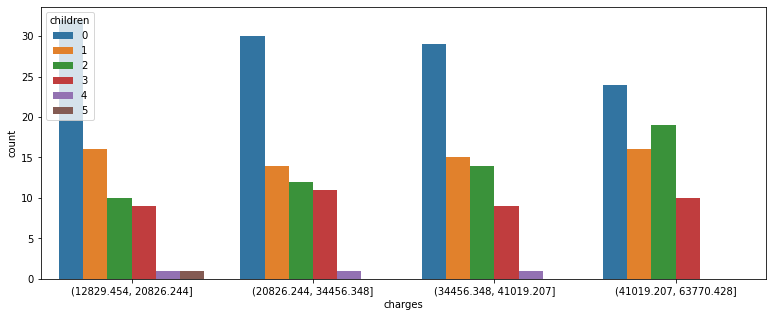

In [ ]:
plt.figure(figsize=(13,5))
sns.countplot(x = pd.qcut(data[data["smoker"] == "yes"]["charges"], q=4), hue="children", data=data[data["smoker"] == "yes"])


##### For non-smokers

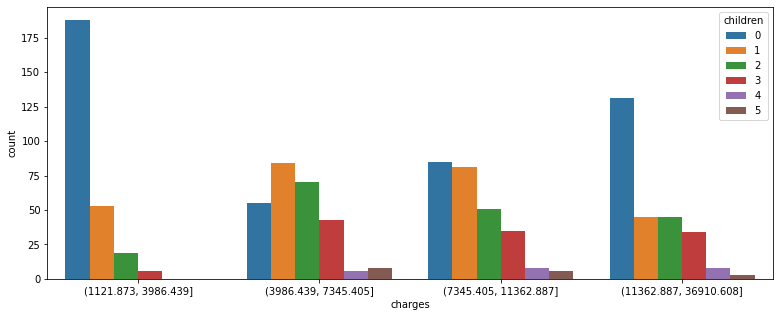

In [ ]:
plt.figure(figsize=(13,5))
sns.countplot(x = pd.qcut(data[data["smoker"] == "no"]["charges"], q=4), hue="children", data=data[data["smoker"] == "no"])


##### Observations

Observation



*   For both smoker and non-smoker, in the bucket of the least charges claimed, frequency of people who have no children is the highest

Inference


*   People with no children have lesser tendency to claim high charges





#### Effect of bmi

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


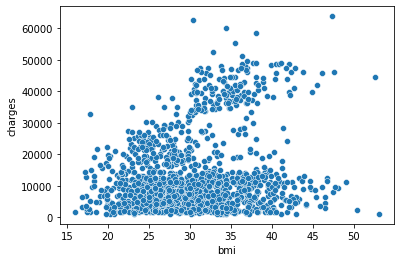

In [ ]:
sns.scatterplot(data['bmi'],data['charges'])

This is the data for bmi as obtained from National Heart, Lung, and Blood Institute. source: https://www.nhlbi.nih.gov/health/educational/lose_wt/risk.htm#limitations

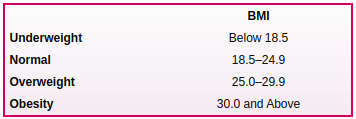

##### Observations

Observation



*   Charges claimed do not increase uniformly with increase in bmi

Inference


*   bmi alone is not responsible for increase in charges claimed







##### Can the trend be explained better using smoker?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


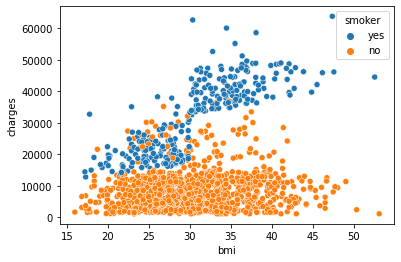

In [ ]:
sns.scatterplot(data['bmi'],data['charges'], hue=data["smoker"])

##### Observations

Observations


*   For non-smokers, the charges claimed does not increase as steeply with bmi, as it does for smokers
*  People who are non-smokers also have really high bmi

Inference



*   smoking does not does not seem to affect the bmi of a person
*   charges claimed are greatly effect by the combined effect of high bmi and smoking habbit





##### Converting bmi into a categorical data

In [ ]:
# create a copy
data_mod = data.copy()

# apply conditions
data_mod["bmi"].loc[(data["bmi"] < 18.5)] = "underweight"
data_mod["bmi"].loc[(data["bmi"] >= 18.5) & (data["bmi"] <= 24.9)] = "normal"
data_mod["bmi"].loc[(data["bmi"] > 24.9) & (data["bmi"] <= 29.9)] = "overweight"
data_mod["bmi"].loc[(data["bmi"] > 29.9)] = "obese" 

data_mod.head()

np.unique(data_mod["bmi"])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

array(['normal', 'obese', 'overweight', 'underweight'], dtype=object)

##### Can the trend of charges claimed with age be explained any better with bmi now?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


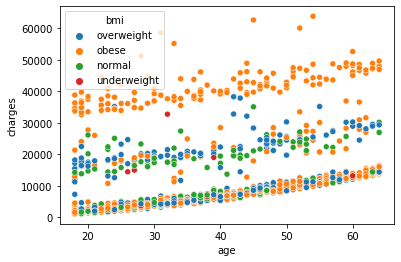

In [ ]:
sns.scatterplot(data['age'],data['charges'], hue=data_mod['bmi'])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


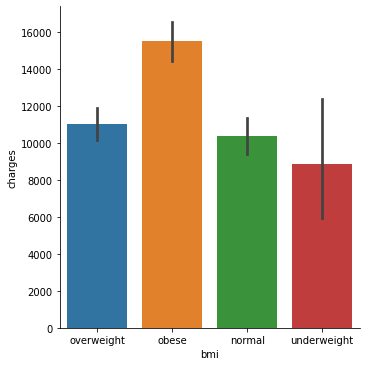

In [ ]:
# check the effect of bmi on charges
sns.factorplot(x = "bmi", y = "charges", data = data_mod, kind = "bar")

##### Observations

Observations


*   The scatter plot confirms our finding that people who smoke and are obese claim highest charges
*   In general, people who are obese or overweight, tend to claim higher charges

Inference

People who are overweight or obese suffer from health related issues, leading to higher claims



##### Does bmi vary the same for male and female?

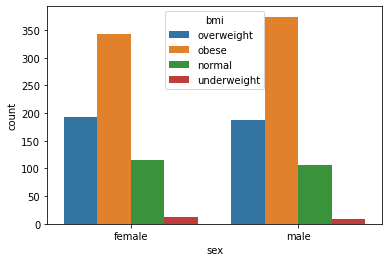

In [ ]:
sns.countplot(x = "sex", hue = "bmi", data = data_mod)

##### Variation of bmi for female of different age groups

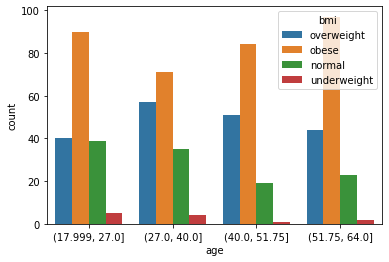

In [ ]:
female = data_mod[data_mod["sex"] == "female"]
sns.countplot(x = pd.qcut(female["age"], q = 4), hue="bmi", data=female)

##### Variation of bmi for male of different age groups

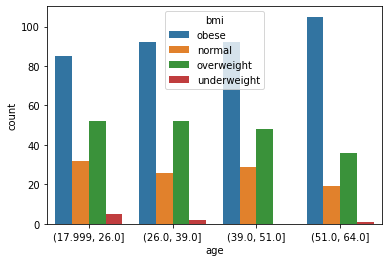

In [ ]:
male = data_mod[data_mod["sex"] == "male"]
sns.countplot(x = pd.qcut(male["age"], q = 4), hue="bmi", data=male)

##### How charges claimed are affected by bmi for male and female

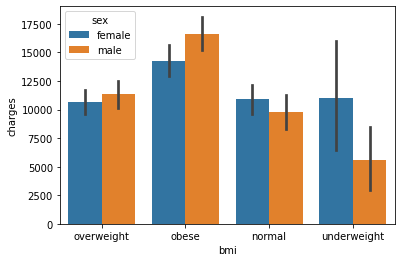

In [ ]:
sns.barplot(x=data_mod["bmi"], y=data_mod["charges"], hue=data_mod["sex"])

##### Observations

Observations



*   There isn't much difference in the distribution of bmi between male and female
*   In all age groups, most beneficiaries who have claimed charges are obese or overweight, irrespective of the sex


*   Males who are overweight or obese have claimed higher charges than females who are overweight or obese
*   Females who are normal or underweight have claimed higher charges than their male counterparts








#### Summary

Summary



1.   Charges claimed by beneficiaries **increase with age**. Possible explanation can be that people face more health related issues with increasing age
2.   The **maximum number** of claims are from beneficiaries with age around **18 to 22**. There are **more male beneficiaries around this age than female**. Possible explanation can be road accidents that happen due to unskilled driving at young age
3. The charges data is **positively skewed** with high number of outliers
4. The charges claimed by beneficiaries **increase** with **increase in age**. However, there are 3 clear increasing stacks of charges claimed for all age groups
5. Smokers claim **much higher charges** than non-smokers. Possible explanation can be the impact that smoking has on health
6. There are **more male smokers** than female smokers, hence **male beneficiaries claim higher charges** than female beneficiaries across all age groups
7. **Southeast region** has the highest number of smokers
8. The distribution of number of children for male and female beneficiaries are almost **similar**
9. Beneficiaries (both smokers and non-smokers) with **no children** tend to claim the **least charges **
10. Other than smoking status, the next important factor is the **bmi** of the beneficiaries. **Smokers who have high bmi** claim the **highest charges** (topmost stack in an age vs charges plot)
11. Charges claimed by **non-smokers** do **not increase much** with **increase in bmi**
11. **Male** beneficiaries who are **obese or overweight**, claim **more charges** than the **female** beneficiaries who are obese or overweight
12. **Female** beneficiaries who are **normal or underweight**, claim **more charges** than the **male** beneficiaries who are normal or underweight





**Next, we can move on to build a regression model to predict the insurance prices.**



